In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [2]:
df_train=pd.read_csv("D:/studies/depi/ottawa/second term/ai for cs/ass/traindata.csv")
df_test = pd.read_csv("D:/studies/depi/ottawa/second term/ai for cs/ass/testdata.csv")

C:\Users\abdo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#show the training data
df_train

,Unnamed: 0,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F78,F79,F80,F81,F82,F83,F84,F85,F86,Label
0,0,687,172.16.0.5-192.168.50.1-26580-22-6,172.16.0.5,26580,192.168.50.1,22,6,2018-12-01 09:22:09.400341,11435366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
1,1,638,192.168.50.7-52.114.77.33-50657-443-6,192.168.50.7,50657,52.114.77.33,443,6,2018-12-01 09:22:09.722697,102387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
2,2,9352,192.168.50.7-52.114.77.33-50657-443-6,52.114.77.33,443,192.168.50.7,50657,6,2018-12-01 09:22:09.825086,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
3,3,640,192.168.50.7-74.208.236.171-50572-80-6,74.208.236.171,80,192.168.50.7,50572,6,2018-12-01 09:22:11.029229,141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
4,4,7435,192.168.50.7-74.208.236.171-50572-80-6,192.168.50.7,50572,74.208.236.171,80,6,2018-12-01 09:22:11.029380,54918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136406,136406,178379,172.16.0.5-192.168.50.1-648-55755-17,172.16.0.5,648,192.168.50.1,55755,17,2018-12-01 12:00:16.082867,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
136407,136407,200065,172.16.0.5-192.168.50.1-592-17197-17,172.16.0.5,592,192.168.50.1,17197,17,2018-12-01 12:00:16.082955,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
136408,136408,229189,172.16.0.5-192.168.50.1-593-39092-17,172.16.0.5,593,192.168.50.1,39092,17,2018-12-01 12:00:16.082957,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
136409,136409,232005,172.16.0.5-192.168.50.1-594-61362-17,172.16.0.5,594,192.168.50.1,61362,17,2018-12-01 12:00:16.083005,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0


In [4]:
#getting info about training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136411 entries, 0 to 136410
Data columns (total 89 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  136411 non-null  int64  
 1   F0          136411 non-null  int64  
 2   F1          136411 non-null  object 
 3   F2          136411 non-null  object 
 4   F3          136411 non-null  int64  
 5   F4          136411 non-null  object 
 6   F5          136411 non-null  int64  
 7   F6          136411 non-null  int64  
 8   F7          136411 non-null  object 
 9   F8          136411 non-null  int64  
 10  F9          136411 non-null  int64  
 11  F10         136411 non-null  int64  
 12  F11         136411 non-null  float64
 13  F12         136411 non-null  float64
 14  F13         136411 non-null  float64
 15  F14         136411 non-null  float64
 16  F15         136411 non-null  float64
 17  F16         136411 non-null  float64
 18  F17         136411 non-null  float64
 19  F1

In [5]:
#show the testing data
df_test

,Unnamed: 0,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F77,F78,F79,F80,F81,F82,F83,F84,F85,F86
0,0,454136,172.16.0.5-192.168.50.4-5967-5967-6,172.16.0.5,5967,192.168.50.4,5967,6,2018-11-03 11:36:30.225322,38928087,...,64.500000,89.802561,128.0,1.0,1.297599e+07,2.360014e+06,15371769.0,10653446.0,0,1
1,1,334585,172.16.0.5-192.168.50.4-48161-46578-6,172.16.0.5,48161,192.168.50.4,46578,6,2018-11-03 11:36:30.225525,105,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
2,2,246617,172.16.0.5-192.168.50.4-22804-22804-6,172.16.0.5,22804,192.168.50.4,22804,6,2018-11-03 11:36:30.225526,24368284,...,90.000000,25.119713,105.0,61.0,8.122671e+06,2.862532e+06,10832964.0,5128982.0,0,1
3,3,43667,172.16.0.5-192.168.50.4-48162-43438-6,172.16.0.5,48162,192.168.50.4,43438,6,2018-11-03 11:36:30.225576,104,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
4,4,84587,172.16.0.5-192.168.50.4-61803-61803-6,172.16.0.5,61803,192.168.50.4,61803,6,2018-11-03 11:36:30.225633,42848358,...,30.333333,25.403412,45.0,1.0,1.428272e+07,8.454236e+05,14853735.0,13311501.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101495,101495,289413,172.16.0.5-192.168.50.4-939-49424-17,172.16.0.5,939,192.168.50.4,49424,17,2018-11-03 10:01:53.446963,1,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
101496,101496,278637,172.16.0.5-192.168.50.4-940-29915-17,172.16.0.5,940,192.168.50.4,29915,17,2018-11-03 10:01:53.447215,1,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
101497,101497,274304,172.16.0.5-192.168.50.4-941-37022-17,172.16.0.5,941,192.168.50.4,37022,17,2018-11-03 10:01:53.447269,1,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
101498,101498,47597,172.16.0.5-192.168.50.4-648-53135-17,172.16.0.5,648,192.168.50.4,53135,17,2018-11-03 10:01:53.447271,48,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1


In [6]:
#getting info about testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 88 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  101500 non-null  int64  
 1   F0          101500 non-null  int64  
 2   F1          101500 non-null  object 
 3   F2          101500 non-null  object 
 4   F3          101500 non-null  int64  
 5   F4          101500 non-null  object 
 6   F5          101500 non-null  int64  
 7   F6          101500 non-null  int64  
 8   F7          101500 non-null  object 
 9   F8          101500 non-null  int64  
 10  F9          101500 non-null  int64  
 11  F10         101500 non-null  int64  
 12  F11         101500 non-null  float64
 13  F12         101500 non-null  float64
 14  F13         101500 non-null  float64
 15  F14         101500 non-null  float64
 16  F15         101500 non-null  float64
 17  F16         101500 non-null  float64
 18  F17         101500 non-null  float64
 19  F1

In [7]:
#drop some coulm in training data and testing data
df_train=df_train.drop(['Unnamed: 0','F1','F2','F4','F7','F85'], axis=1)
df_test=df_test.drop(['Unnamed: 0','F1','F2','F4','F7','F85'], axis=1)

In [8]:
#remove nan and inf from training and testing data
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [9]:
#split training data to features and label
x=df_train.iloc[:,0:83]
y=df_train.iloc[:,83]

In [10]:
#count lable in training data
df_train['Label'].value_counts()

0    125164
1     11247
Name: Label, dtype: int64

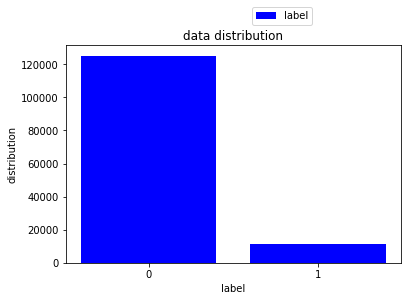

In [11]:
#plot count label in training data
x_1 = np.arange(2)
plt.bar(x_1, df_train['Label'].value_counts(),color='b')
plt.xticks(x_1,[0,1])
plt.xlabel("label")
plt.ylabel("distribution")
plt.title('data distribution')
plt.legend(["label"],bbox_to_anchor =(0.75, 1.2))
plt.show()

In [12]:
#split training data to train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# model 1

In [87]:
#apply randomforest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=400,n_jobs=-1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.9997785160575858
0.9999633471392442


In [88]:
#fitting random forest on the all training data
clf.fit(x,y)
y_pred_test=clf.predict(df_test)

In [ ]:
#save the prediction in csv file
pre={'ID': range(0,len(y_pred_test)),'Class':y_pred_test}
df_pre = pd.DataFrame(pre)
df_pre.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred.csv', index=False)

# model 2

In [89]:
#applying GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf_g = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=0)
clf_g.fit(x_train, y_train)
y_pred_g=clf_g.predict(x_test)
print(f1_score(y_test, y_pred_g))
print(accuracy_score(y_test, y_pred_g))

0.9986719787516601
0.9997800828354653


In [90]:
#fitting GradientBoostingClassifier
clf_g.fit(x,y)
y_pred_test_g=clf_g.predict(df_test)

In [15]:
#save the prediction in csv file
pre_g={'ID': range(0,len(y_pred_test_g)),'Class':y_pred_test_g}
df_pre = pd.DataFrame(pre_g)
df_pre.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred_g_.csv', index=False)

# model 3

In [18]:
#install catboost
#!pip install catboost

In [14]:
#check install catboost 
import catboost
from catboost import CatBoostClassifier
print(catboost.__version__)

1.0.4


In [92]:
#applying CatBoostClassifier
clf_c = CatBoostClassifier(iterations=1000,verbose=0,learning_rate=0.01,random_state=0)
clf_c.fit(x_train, y_train)
y_pred_c=clf_c.predict(x_test)
print(f1_score(y_test, y_pred_c))
print(accuracy_score(y_test, y_pred_c))

0.9995573262505534
0.9999266942784885


In [93]:
#accuracy in training
y_pred_c1=clf_c.predict(x_train)
print(accuracy_score(y_train, y_pred_c1))
print(f1_score(y_train, y_pred_c1))

0.9999908364489407
0.9999443795539241


In [94]:
#fitting CatBoostClassifier
clf_c.fit(x,y)
y_pred_test_c=clf_c.predict(df_test)

In [99]:
#save the prediction in csv file
pre_c={'ID': range(0,len(y_pred_test_c)),'Class':y_pred_test_c}
df_pre = pd.DataFrame(pre_c)
df_pre.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred_cc.csv', index=False)

# model 3 improving parameter in CatBoostClassifier

In [19]:
clf_c_i = CatBoostClassifier(iterations=500,verbose=0,learning_rate=0.05,random_state=0)
clf_c_i.fit(x_train, y_train)
y_pred_c_i=clf_c_i.predict(x_test)
print(f1_score(y_test, y_pred_c_i))
print(accuracy_score(y_test, y_pred_c_i))

1.0
1.0


In [20]:
clf_c_i.fit(x,y)
y_pred_test_c_i=clf_c_i.predict(df_test)

In [18]:
pre_c_i={'ID': range(0,len(y_pred_test_c_i)),'Class':y_pred_test_c_i}
df_pre_i = pd.DataFrame(pre_c_i)
df_pre_i.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred_cccc.csv', index=False)

# note

iterations and learning_rate have an effect on the CatBoostClassifier

# model 4

In [95]:
#applying VotingClassifier
from sklearn.ensemble import VotingClassifier
clf_v = VotingClassifier(estimators=[('random', clf), ('gra', clf_g), ('cat', clf_c)],voting='hard')
clf_v.fit(x_train, y_train)
y_pred_v=clf_v.predict(x_test)
print(f1_score(y_test, y_pred_v))
print(accuracy_score(y_test, y_pred_v))

0.9995573262505534
0.9999266942784885


In [96]:
#fitting VotingClassifier 
clf_v.fit(x,y)
y_pred_test_v=clf_v.predict(df_test)

In [27]:
#save the prediction in csv file
pre_v={'ID': range(0,len(y_pred_test_v)),'Class':y_pred_test_v}
df_pre = pd.DataFrame(pre_v)
df_pre.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred_v.csv', index=False)

# model 5

In [28]:
#install xgboost
#!pip install xgboost

In [97]:
#applying XGBClassifier
from xgboost import XGBClassifier
clf_x=XGBClassifier(objective ='binary:logistic',n_jobs=-1,n_estimators=600,learning_rate=0.02)
clf_x.fit(x_train, y_train)
y_pred_x=clf_x.predict(x_test)
print(f1_score(y_test, y_pred_x))
print(accuracy_score(y_test, y_pred_x))

C:\Users\abdo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9995571302037201
0.9999266942784885


In [98]:
#fitting XGBClassifier
clf_x.fit(x,y)
y_pred_test_x=clf_x.predict(df_test)

[18:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
#save the prediction in csv file
pre_x={'ID': range(0,len(y_pred_test_x)),'Class':y_pred_test_x}
df_pre = pd.DataFrame(pre_x)
df_pre.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred_x_.csv', index=False)

# model 6

I try decrease number of the feature. There are four ways such as feature selection, dimensionality Reduction,  correlation matrix and use decescion tree to obtain important feature. I choice using decescion tree to obtain important feature.I obtian 18 features is very important

In [81]:
# apply decision tree
clf_d = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf_d.fit(x_train,y_train)
important_feature = clf_d.feature_importances_

In [82]:
#show important feature
important_feature

array([7.95435486e-01, 4.35479135e-04, 2.05540105e-02, 1.61409367e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.11915195e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.52447111e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.12837765e-04, 0.00000000e+00, 1.87741085e-04,
       0.00000000e+00, 8.06819335e-05, 2.19346991e-03, 1.10994579e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.09657840e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.95288493e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [83]:
#obtain index of the important_feature with order
sorted_importance_feature = np.argsort(important_feature)[::-1]
sorted_importance_feature

array([ 0, 73, 15, 82, 71,  2, 41, 26,  3, 79,  1, 70, 11, 21, 32, 23, 27,
       25, 33, 20, 30, 29, 34, 28, 35, 24, 22, 31, 16, 19, 18, 17, 37, 80,
       14, 13, 12, 10,  9,  8,  7,  6,  5,  4, 36, 78, 38, 57, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 72, 74, 75, 76, 58, 56, 77, 55, 40,
       81, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 39],
      dtype=int64)

In [86]:
impotrant_index = sorted_importance_feature[:18]

In [87]:
impotrant_index

array([ 0, 73, 15, 82, 71,  2, 41, 26,  3, 79,  1, 70, 11, 21, 32, 23, 27,
       25], dtype=int64)

In [88]:
important_feature[25]

8.068193346874548e-05

In [90]:
#delet not importance feature in traing and testing 
#show the new shape 
x___train=x_train.iloc[:,impotrant_index]
x___test=x_test.iloc[:,impotrant_index]
df__test=df_test.iloc[:,impotrant_index]
x___=x.iloc[:,impotrant_index]
print(x___train.shape)
print(x___test.shape)
print(df__test.shape)
print(x___.shape)

(109128, 18)
(27283, 18)
(101500, 18)
(136411, 18)


In [120]:
#apply CatBoostClassifier
clf_c_im = CatBoostClassifier(iterations=1500,verbose=0,learning_rate=0.01,random_state=0)
clf_c_im.fit(x___train, y_train)
y_pred_c_im=clf_c_im.predict(x___test)
print(f1_score(y_test, y_pred_c_im))
print(accuracy_score(y_test, y_pred_c_im))

0.9988998899889989
0.9998167356962211


In [121]:
#fit model on the training data
clf_c_im.fit(x___,y)
y_pred_test_c_im=clf_c_im.predict(df__test)

In [119]:
#save file
pre_c={'ID': range(0,len(y_pred_test_c_im)),'Class':y_pred_test_c_im}
df_pre = pd.DataFrame(pre_c)
df_pre.to_csv('D:/studies/depi/ottawa/second term/ai for cs/ass/pred_cccccc.csv', index=False)